<a href="https://colab.research.google.com/github/rictika/programming/blob/main/Programming_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive; drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1200x600 with 0 Axes>

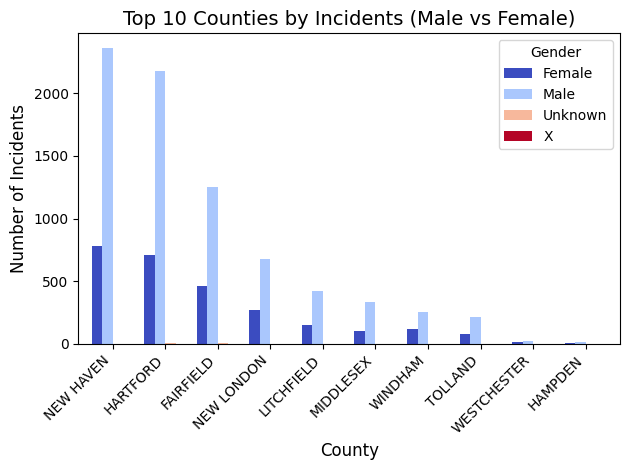

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#The dataset is loaded into a DataFrame from a CSV file. It contains information about accidental drug-related deaths from 2012 to 2023.
data = pd.read_csv("/content/drive/MyDrive/Assighnemnt_1/Accidental_Drug_Related_Deaths_2012-2023.csv")

# Data cleaning
data['Sex'] = data['Sex'].str.strip().str.title() # Removes extra spaces and capitalizes the first letter.
data['Fentanyl'] = data['Fentanyl'].str.strip().str.upper() # Remove spaces and converts all text to uppercase
data['Age'] = data['Age'].fillna(data['Age'].median())  # Missing values in the "Age" column are replaced with the median value of that column. This is a common practice for handling missing numerical data.
data['Sex'] = data['Sex'].fillna('Unknown') # Missing values in the "Sex" column are replaced with "Unknown"


residence_gender = data.groupby(['Sex', 'Residence County']).size().unstack(fill_value=0)  # This groups the data first by Sex and then by Residence County. For each combination of Sex and Residence County, it counts the occurrences
top_counties = residence_gender.sum(axis=0).sort_values(ascending=False).head(10).index # Sums the values across rows to get the total number of incidents per county.
top_residence_gender = residence_gender[top_counties] # Filters the original data to include only the top 10 counties


plt.figure(figsize=(12, 6)) # Adjusts a figure's initial dimensions to 12 inches wide by 6 inches tall.
top_residence_gender.T.plot(kind='bar', colormap="coolwarm", width=0.8) # Plotting a bar chart for the top residence counties, with gender distribution.

plt.title("Top 10 Counties by Incidents (Male vs Female)", fontsize=14) # Adds a title to the plot.
plt.ylabel("Number of Incidents", fontsize=12)  # Labels the y-axis (Number of Incidents) and x-axis (County).
plt.xlabel("County", fontsize=12)
plt.legend(title="Gender", loc="upper right") # Adds a legend to the plot with the title "Gender".
plt.xticks(rotation=45, ha="right") # Rotates the x-axis labels (county names) by 45 degrees for better readability.
plt.tight_layout()
plt.show()

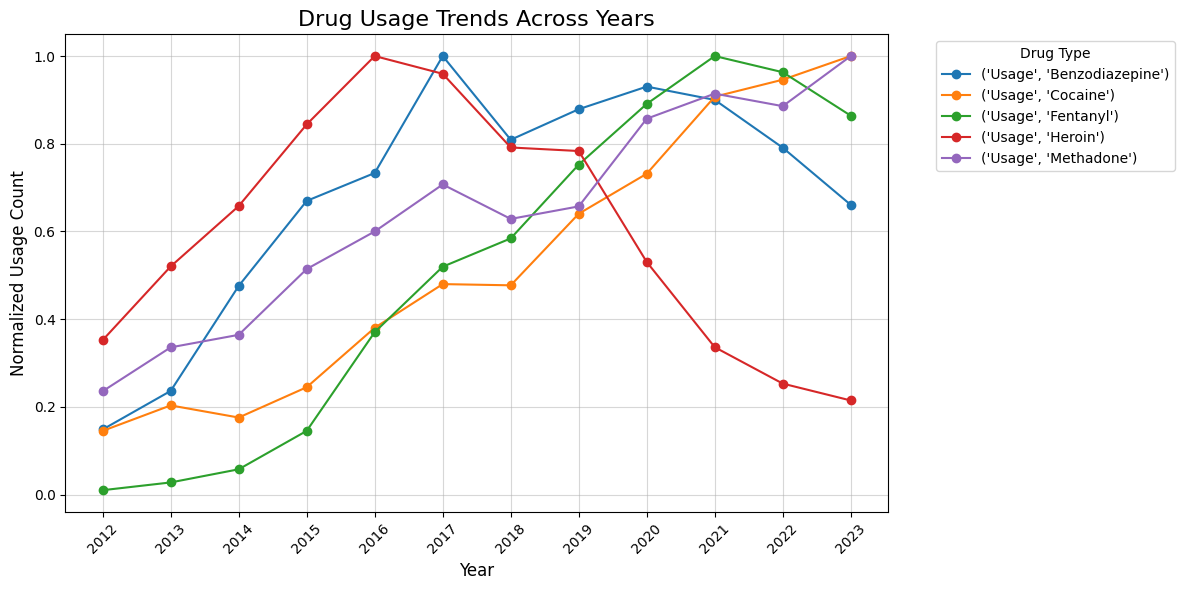

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset (for illustration, replace with actual data)
# data = pd.read_csv("path_to_your_file.csv")

# List of drug-related columns we want to analyze
drug_columns = ['Fentanyl', 'Heroin', 'Cocaine', 'Methadone', 'Benzodiazepine']

# Preprocess the dataset to extract useful information
# Convert the 'Date' column into a proper date format, then extract only the year.
data['Year'] = pd.to_datetime(data['Date'], errors='coerce').dt.year

# Transform the data for easier analysis
# We’re reshaping the dataset so that each row shows the year, drug type, and whether it was used.
drug_usage_by_year = data.melt(
    id_vars=['Year'],  # Keep the 'Year' column as it is.
    value_vars=drug_columns,  # Focus only on the drug-related columns.
    var_name='Drug Type',  # Create a new column called 'Drug Type' to hold the drug names.
    value_name='Usage'  # Create another column called 'Usage' to indicate if the drug was used (Y/N).
)

# Convert "Yes" (Y) and "No" (N) in the drug columns into numbers (1 for Y, 0 for N)
drug_usage_by_year['Usage'] = drug_usage_by_year['Usage'].map({'Y': 1, 'N': 0})

# Filter out cases where the drug was not used (i.e., Usage = 0) and group the data by year and drug type
drug_usage_by_year = (
    drug_usage_by_year.groupby(['Year', 'Drug Type'])  # Group the data by year and drug type.
    .agg({'Usage': 'sum'})  # Count the number of times each drug was used in a given year.
    .unstack(fill_value=0)  # Reshape the data into a table where each column is a drug.
)

# Normalize the data by dividing each drug's usage by the max usage for that drug
normalized_year_data = drug_usage_by_year / drug_usage_by_year.max()

# Create a line plot to visualize the trends
plt.figure(figsize=(12, 6))  # Set the size of the plot.

# Draw a line for each drug type
for drug in normalized_year_data.columns:
    plt.plot(
        normalized_year_data.index,  # Use the years as the x-axis.
        normalized_year_data[drug],  # Use the normalized usage numbers as the y-axis.
        marker='o',  # Add markers to highlight data points.
        #'label=drug' The Label was giving error as the drug is string.
        label=str(drug)  # Explicitly cast 'drug' to string
    )

# Add a title and labels to the plot
plt.title('Drug Usage Trends Across Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Usage Count', fontsize=12)

# Rotate the year labels on the x-axis so they’re easier to read
plt.xticks(normalized_year_data.index, rotation=45)

# Add a legend to show which line corresponds to which drug
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a grid to make it easier to follow the trends
plt.grid(alpha=0.5)

# Adjust the layout so nothing overlaps or gets cut off
plt.tight_layout()

# Show the final plot
plt.show()


**Identifying the age group most affected can inform policies and interventions, e.g., targeting educational campaigns or healthcare resources to vulnerable populations.**

Peak Age Group: Incidents are most frequent among 40–60 years, followed by 20–40 years. Gender Dominance: Males are significantly more affected across all age groups.

<ipython-input-35-e661f1c81a90>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender")


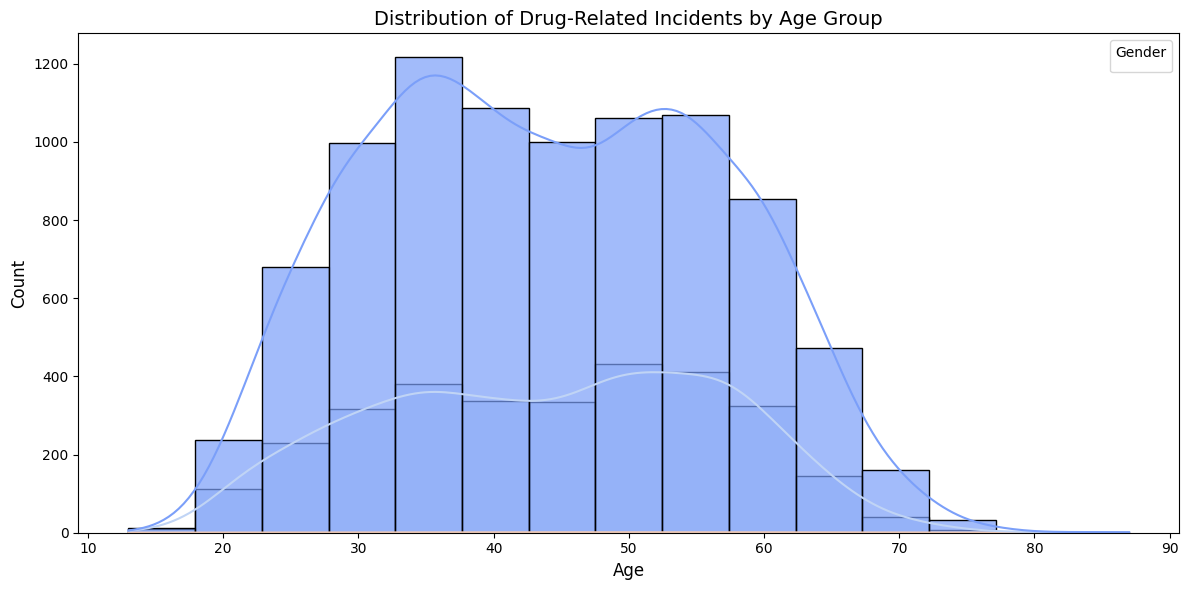

In [35]:
plt.figure(figsize=(12, 6))
# Create a histogram to visualize the age distribution
"""sns.histplot() is used to create a histogram with Seaborn.
bins=15: Divides the age range into 15 bins (intervals), determining the granularity of the histogram.
hue="Sex": Splits the data by the "Sex" column, coloring the bars by gender (e.g., Male/Female).
kde=True: Adds a Kernel Density Estimate (KDE) curve to the histogram for smoother visualization of the distribution.
palette="coolwarm"`: Assigns a color palette to visually distinguish genders.
alpha=0.7: Sets the transparency of the bars, allowing overlapping bars to be partially visible."""

sns.histplot(data, x="Age", bins=15, hue="Sex", kde=True, palette="coolwarm", alpha=0.7)

# Add a title and axis labels
# Adds a title to the plot with a font size of 14.
plt.title("Distribution of Drug-Related Incidents by Age Group", fontsize=14)
# Labels the x-axis as "Age" with a font size of 12.
plt.xlabel("Age", fontsize=12)
# Labels the y-axis as "Count" with a font size of 12.
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

The dataset shows limited direct relationships between these specific substances and age

<ipython-input-19-b4f122d46e1b>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_data = filtered_data.fillna(0)


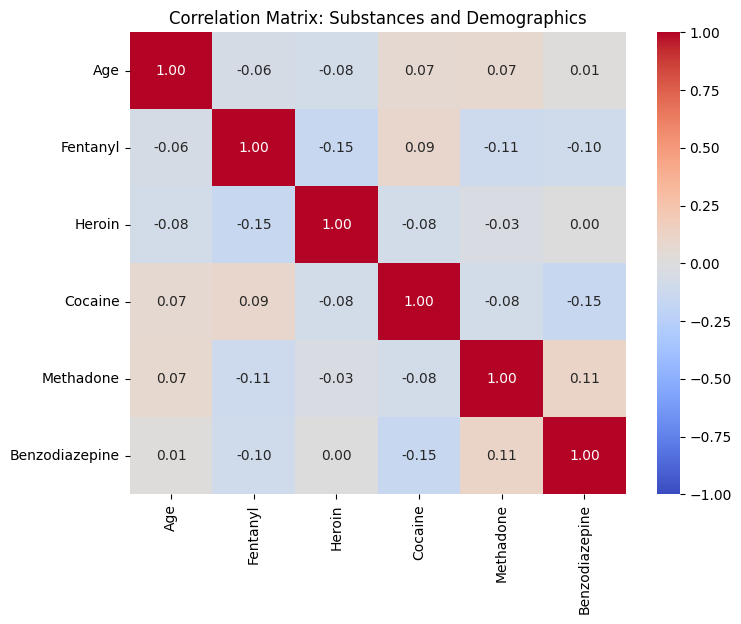

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pick out the columns we're interested in
# We're looking at age and some drugs (like Fentanyl and Heroin) for our analysis
columns_of_interest = ['Age', 'Fentanyl', 'Heroin', 'Cocaine', 'Methadone', 'Benzodiazepine']
filtered_data = data[columns_of_interest].copy()  # Make a clean copy so we don't mess with the original data

# Convert "Yes" (Y) and "No" (N) in the drug columns into numbers (1 for Y, 0 for N)
binary_conversion_columns = ['Fentanyl', 'Heroin', 'Cocaine', 'Methadone', 'Benzodiazepine']
for col in binary_conversion_columns:
    filtered_data.loc[:, col] = filtered_data[col].map({'Y': 1, 'N': 0})  # Turn 'Y' into 1, 'N' into 0

# Fill in any missing values (empty cells) with 0, so they don't mess up our analysis
filtered_data = filtered_data.fillna(0)

# Now calculate how these variables are related to each other
# For example, does age correlate with Fentanyl use? Or do certain drugs tend to occur together?
correlation_matrix = filtered_data.corr()

# Time to make the correlation data look good! Let's plot it as a heatmap
plt.figure(figsize=(8, 6))  # Set the size of the chart
sns.heatmap(
    correlation_matrix,  # Use our calculated correlations
    annot=True,  # Add the actual correlation numbers to each cell in the heatmap
    cmap='coolwarm',  # Use a red-to-blue color scheme for better visibility
    fmt=".2f",  # Show the numbers with two decimal places
    vmin=-1,  # The minimum value for the color scale (strong negative correlation)
    vmax=1  # The maximum value for the color scale (strong positive correlation)
)
plt.title("Correlation Matrix: Substances and Demographics")  # Add a title so we know what we're looking at
plt.show()  # Display the chart


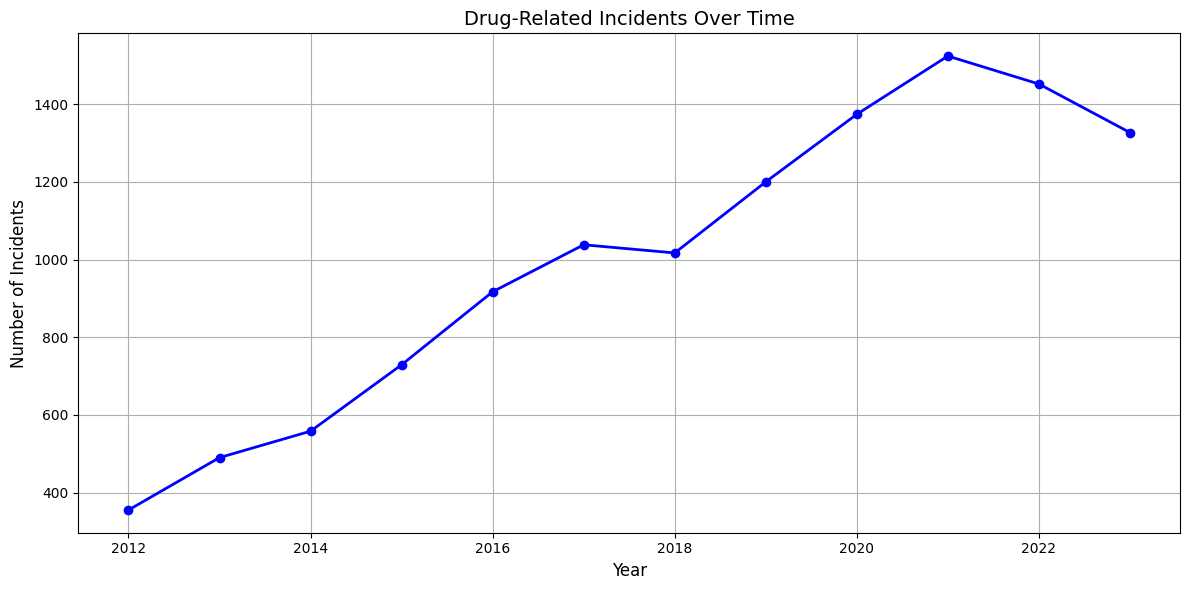

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to a proper date format
# This helps us extract the year easily
data['Date'] = pd.to_datetime(data['Date'])

# Extract just the year from the 'Date' column
# We'll group the data by year to count incidents for each year
data['Year'] = data['Date'].dt.year

# Count how many incidents happened in each year
# This gives us the total number of incidents per year
yearly_counts = data['Year'].value_counts().sort_index()
# Now let's make the line chart!
plt.figure(figsize=(12, 6))  # Set the chart size
plt.plot(
    yearly_counts.index,  # The years (x-axis)
    yearly_counts.values,  # The number of incidents (y-axis)
    marker='o',  # Add a marker at each data point
    color='blue',  # Use blue for the line
    linestyle='-',  # Use a solid line
    linewidth=2  # Make the line a bit thicker
)

# Add a title and labels so the chart is clear
plt.title('Drug-Related Incidents Over Time', fontsize=14)  # Title of the chart
plt.xlabel('Year', fontsize=12)  # Label for the x-axis
plt.ylabel('Number of Incidents', fontsize=12)  # Label for the y-axis

# Add a grid for better readability
plt.grid(True)

# Adjust the layout to make everything fit nicely
plt.tight_layout()

# Show the chart
plt.show()


Compared to other leading causes like accidents and suicides, drug-related deaths are not only substantial but are also showing consistent growth, emphasizing their critical role in overall mortality.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/MyDrive/Assighnemnt_1/Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv"
df = pd.read_csv(file_path)

# List of all relevant causes of death, with focus on specific causes
causes = [
    'Motor Vehicle Accidents',
    'Intentional Self-Harm (Suicide)',
    'Assault (Homicide)',
    'Drug Overdose'
]

# Aggregate yearly totals for each cause of death
yearly_deaths = df.groupby('Year')[causes].sum()




1.Motor Vehicle Accidents: There was an increase in the death during the years and then a slight decrease.

2.Suicide: Similarly, you can track if suicide deaths have a rise and then slight decrease at the end of the year.

3.Homicide: Homicide data could show patterns based on socio-political changes, crime rates, or interventions.This shows a constant increase in the death.

4.Drug Overdose: Overall this has also shown a increase.

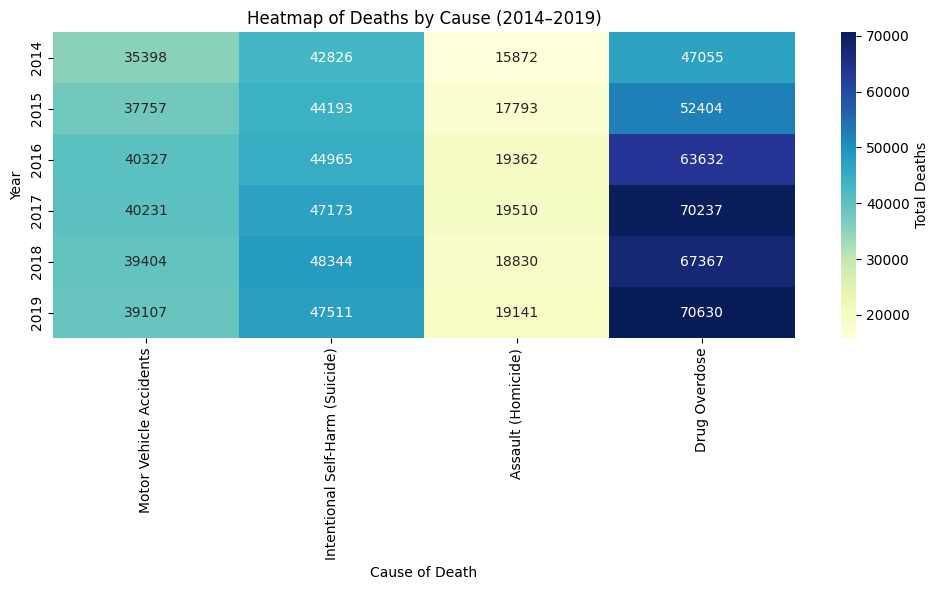

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap with formatted annotations
plt.figure(figsize=(10, 6))

"""Initially when i was using heatmap i came accross an issue that is Python (and seaborn by default) might use scientific notation (e.g., 1e+05 for 100,000) when displaying numbers,
 especially large ones. To solve this i used **fmt='g'** allows the number to be displayed fully, in regular integer or decimal format, instead of using scientific notation (like 1e+05 for 100,000).
 **This helps improve readability when displaying data in heatmaps where it's crucial to view the exact values.**"""

sns.heatmap(yearly_deaths, annot=True, fmt='g', cmap="YlGnBu", cbar_kws={'label': 'Total Deaths'})
plt.xlabel('Cause of Death')
plt.ylabel('Year')
plt.title('Heatmap of Deaths by Cause (2014–2019)')
plt.tight_layout()
plt.show()
